# **Telecom Customer Segmentation Churn Project**

**What means Churn ?**

Churn refers to when a customer **stops using telecom a service** and switches to another provider. The goal of a Telecom Customer Segmentation Churn Project is to **predict which customers are likely to leave** so companies can take actions to retain them.


***Objective*** - Identify factors that cause customer churn and build a model to predict churn.

***Impact*** - Helps companies reduce churn by offering targeted promotions, better service, or personalized customer support.

This dataset contains **13 columns** and **15000 rows**.
Description of the features is -
1.  **CustomerID** - Unique id for each customer
2.  **Age** - Age of customer
3.  **Gender** - Gender of customer
4.  **Tenure** - How long customer has been with the provider(in months)
5.  **Monthly Charges** - Monthly bill amount
6.  **Total Charges** - Total amount paid by the customer
7.  **Contract Type** - Type of contract('Two year', 'One year', 'Month-to-month')
8.  **Has Internet Service** - Type of internet service customer has('No', 'DSL', 'Fiber optic')
9.   **Has Online Security Service** - Prevent customer data from fraud('No', 'Yes')
10.  **Has Device Protection Plan** - A device protection plan covers damage, theft or malfunctions(yes/no).
11. **Number of Complaints Last Year** - The no of customer's complaint in last year.
12. **Churn** - Whether the customer left or not(yes/no).
13. **Region** - The geographical area where the customer is located('South', 'East', 'North', 'West')


In [5]:
import pandas as pd   #for data manipulation
import numpy as np     #for numerical operations and multi dimensional array     
import seaborn as sns      #for advanced visualizations
import matplotlib.pyplot as plt   #for visualizations

## *Exploratory Data Analysis(EDA)*

**EDA is the process of analyzing and summarizing a dataset to understand its patterns, relationships, and key insights before applying machine learning models.**

Steps of EDA:
1. **Understanding Data** - Checking the shape, column names and types.
2. **Handling Missing Values** - Finding and filling/removing missing data.
3. **Checking for Duplicates** - Identifying and duplicate records.
4. **Summarizing Data** - Using describe(), info(), and value counts.
5. **Detecting Outliers** - Using box plots and statistical methods.
6. **Analyzing Relationships** - Using correlation matrices
7. **Visualizing Data** - Using various charts

In [7]:
#reading csv file using pandas
df = pd.read_csv("C:\\Users\\HP\\Downloads\\Telecom_Customer_Segmentation_Churn_Dataset.csv")

In [8]:
df.head()   #displaying first five rows

,CustomerID,Age,Gender,Tenure,Monthly Charges,Total Charges,Contract Type,Has Internet Service,Has Online Security Service,Has Device Protection Plan,Number of Complaints Last Year,Churn,Region
0,1,56,Female,41,78.22,5706.78,Two year,No,Yes,Yes,0,1,South
1,2,69,Male,55,120.48,790.58,One year,DSL,Yes,No,9,0,East
2,3,46,Female,7,90.26,3419.78,One year,No,No,Yes,8,0,South
3,4,32,Male,18,74.50,806.20,Two year,DSL,No,No,4,0,South
4,5,60,Female,43,46.38,1568.84,Month-to-month,Fiber optic,No,Yes,5,0,North


In [9]:
df.shape      #checking no of rows and columns in dataset

(15000, 13)

In [10]:
df.nunique()     #checking unique in each column 

CustomerID                        15000
Age                                  52
Gender                                3
Tenure                               71
Monthly Charges                    7759
Total Charges                     14834
Contract Type                         3
Has Internet Service                  3
Has Online Security Service           2
Has Device Protection Plan            2
Number of Complaints Last Year       10
Churn                                 2
Region                                4
dtype: int64

**In this telecom customer segmentation churn project 15000 unique entries with 13 columns which are 'CustomerID', 'Age', 'Gender', 'Tenure', 'Monthly Charges', 'Total Charges', 'Contract Type', 'Has Internet Service','Has Online Security Service', 'Has Device Protection Plan',
'Number of Complaints Last Year', 'Churn', 'Region'.
Tenre is the no of months customer has been with the provider.**

In [12]:
df.columns    #columns of dataframe

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Monthly Charges',
       'Total Charges', 'Contract Type', 'Has Internet Service',
       'Has Online Security Service', 'Has Device Protection Plan',
       'Number of Complaints Last Year', 'Churn', 'Region'],
      dtype='object')

In [13]:
df.duplicated().value_counts()  #checking counts of duplicates

False    15000
Name: count, dtype: int64

In [14]:
df.info()   #column names, non-null values, data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      15000 non-null  int64  
 1   Age                             15000 non-null  int64  
 2   Gender                          15000 non-null  object 
 3   Tenure                          15000 non-null  int64  
 4   Monthly Charges                 15000 non-null  float64
 5   Total Charges                   15000 non-null  float64
 6   Contract Type                   15000 non-null  object 
 7   Has Internet Service            15000 non-null  object 
 8   Has Online Security Service     15000 non-null  object 
 9   Has Device Protection Plan      15000 non-null  object 
 10  Number of Complaints Last Year  15000 non-null  int64  
 11  Churn                           15000 non-null  int64  
 12  Region                          

In [15]:
df.duplicated().sum()     #checking duplicates 

0

In [16]:
df.isnull().sum()     #checking null values

CustomerID                        0
Age                               0
Gender                            0
Tenure                            0
Monthly Charges                   0
Total Charges                     0
Contract Type                     0
Has Internet Service              0
Has Online Security Service       0
Has Device Protection Plan        0
Number of Complaints Last Year    0
Churn                             0
Region                            0
dtype: int64

**In this dataset their is no null values, no missing values and no duplicates.**

In [18]:
df.describe()     #statistical summary of numerical columns

,CustomerID,Age,Tenure,Monthly Charges,Total Charges,Number of Complaints Last Year,Churn
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7500.500000,43.452667,35.996067,80.517022,2898.212717,4.469200,0.292867
std,4330.271354,14.910732,20.509132,29.155010,2042.690053,2.882754,0.455093
min,1.000000,18.000000,1.000000,30.000000,30.080000,0.000000,0.000000
25%,3750.750000,31.000000,18.000000,55.417500,1254.250000,2.000000,0.000000
50%,7500.500000,43.000000,36.000000,80.495000,2479.530000,4.000000,0.000000
75%,11250.250000,56.000000,54.000000,105.800000,4226.795000,7.000000,1.000000
max,15000.000000,69.000000,71.000000,130.980000,9219.980000,9.000000,1.000000


### **_Age_** : 

_ **1.** Minimum age is 18 and maximum age is 69 in this dataset.

_ **2.** Age has range 51.
   
_ **3.** High value of standard deviation because age is varying from 18 to 69.

_ **4.** It has average 43.45 which means most of the people can have age near 43.

_ **5.** Age has first quartile 31 means first 25% of data below this value.

_ **6.** Age has Second quartile 43 means first 50% of data below this value.

_ **7.** Age has third quartile 56 means first 75% of data below this value.

_**8.** Age has forth quartile 81 means first 100% of data below this value.


### **_Tenure_** : 
_ **1.** Minimum tenure is 1 and maximum tenure is 71 in this dataset means customer is from how many months with provider.

_ **2.** Tenure has range 70.
   
_ **3.** High value of standard deviation because tenure is varying from 1 to 71.

_ **4.** It has average 35 which means most of the customer with provider since 35 months.

_ **5.** Age has first quartile 18 means first 25% of data below this value.

_ **6.** Age has Second quartile 36 means first 50% of data below this value.

_ **7.** Age has third quartile 54 means first 75% of data below this value.

_**8.** Age has forth quartile 71 means first 100% of data below this value.


### **_Monthly Charges_** : 
_ **1.** Minimum monthly charges are 30 and maximum monthly charges are 130.98 in this dataset.

_ **2.** Monthly charges has range 100.
   
_ **3.** High value of standard deviation because tenure is varying from 30 to 130.

_ **4.** It has average 80.51 which means most of the customer monthly pays nearly 80.

_ **5.** Monthly charges has first quartile 55.417500 means first 25% of data below this value.

_ **6.** Monthly charges has Second quartile 80.495000 means first 50% of data below this value.

_ **7.** Monthly charges has third quartile 105.800000 means first 75% of data below this value.

_**8.** Monthly charges has forth quartile 130.980000 means first 100% of data below this value.


### **_Total Charges_** : 
_ **1.** Minimum Total Charges are 30.080000 and maximum Total Charges are 9219.980000 in this dataset .

_ **2.** Total Charges has range 9189.90
   
_ **3.** High value of standard deviation because Total Charges is varying from 30.080000 to 9219.980000

_ **4.** It has average 2898.212717 which means most of the customer paid upto near 2900.

_ **5.** Total Charges has first quartile 1254.250000 means first 25% of data below this value.

_ **6.** Total Charges has Second quartile 2479.530000 means first 50% of data below this value.

_ **7.** Total Charges has third quartile 4226.795000 means first 75% of data below this value.

_**8.** Total Charges has forth quartile 9219.980000 means first 100% of data below this value.


### **_No of complaints last year_** : 
_ **1.** Minimum No of complaints last year are 0 and maximum No of complaints last year are 9 in this dataset .

_ **2.** No of complaints last year has range 9.
   
_ **3.** Low value of standard deviation because No of complaints last year is varying from 1 to 9 only and datapoints are closer to mean.

_ **4.** It has average 4.469200 which means most of the customer has last years complaint near 4 or 5.

_ **5.** No of complaints last year has first quartile 1254.250000 means first 25% of data below this value.

_ **6.** No of complaints last year has Second quartile 2479.530000 means first 50% of data below this value.

_ **7.** No of complaints last year has third quartile 4226.795000 means first 75% of data below this value.

_**8.** No of complaints last year has forth quartile 9219.980000 means first 100% of data below this value.


### **_Churn_** : 
_ **1.** Churn has value 1 and not churn has value 0.

_ **2.** Churn has count 4393

_ **3.** Not Churn has count 10607


In [25]:
df["Churn"].value_counts()   #checking each value in a column of churn

Churn
0    10607
1     4393
Name: count, dtype: int64

**This dataset has class imbalance beacause the number of not churn(10607) is significantly higher than churn(4393).**

In [27]:
df.columns   #columns in the dataset

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Monthly Charges',
       'Total Charges', 'Contract Type', 'Has Internet Service',
       'Has Online Security Service', 'Has Device Protection Plan',
       'Number of Complaints Last Year', 'Churn', 'Region'],
      dtype='object')

In [28]:
categorical_columns = ['Region','Churn','Has Internet Service','Has Online Security Service', 'Has Device Protection Plan','Gender','Contract Type']
numerical_columns = ['Age','Monthly Charges','Tenure','Total Charges','Number of Complaints Last Year']

### 
**Univariate Analysis of Categorical columns**

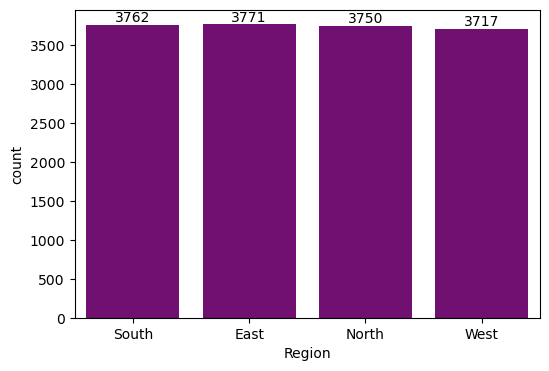

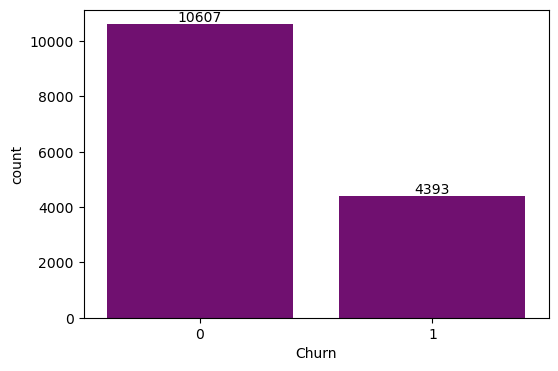

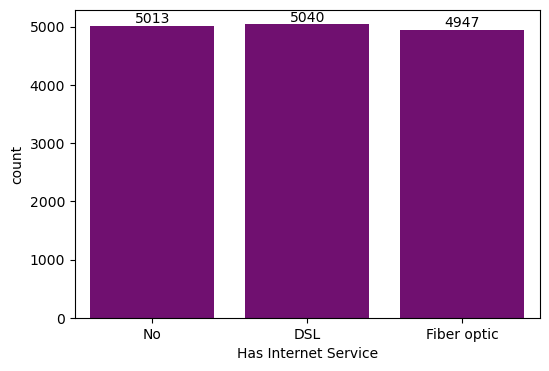

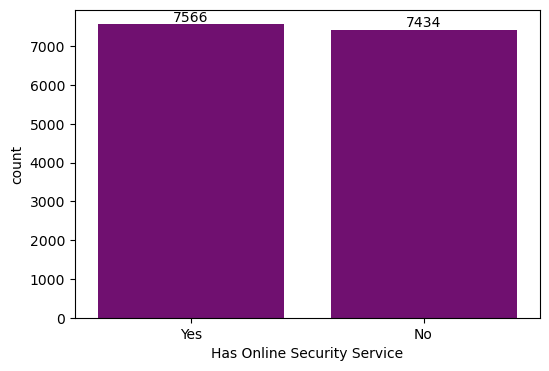

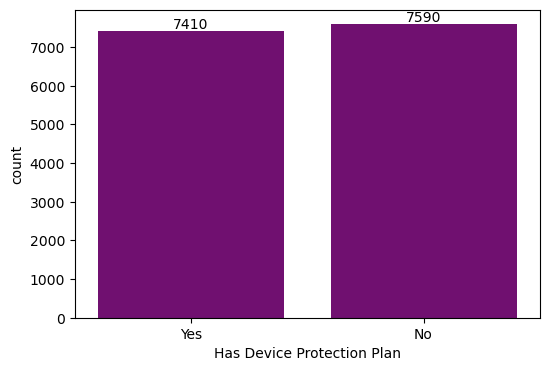

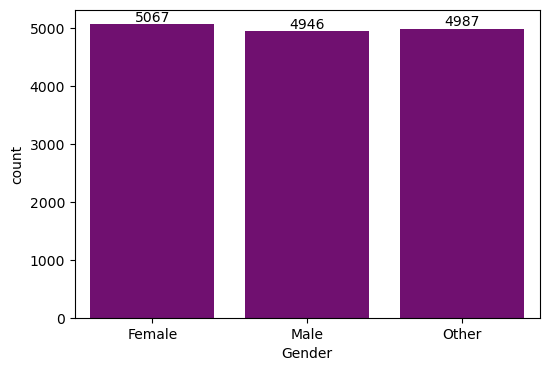

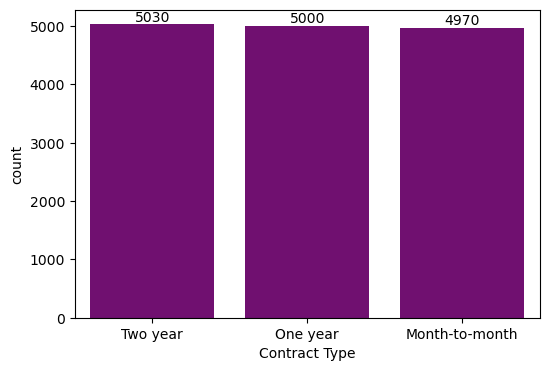

In [30]:
for cols in categorical_columns:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(data=df,x=cols, color="purple")
    ax.bar_label(ax.containers[0])
plt.show()
                

**Interpretation -**

_**1.**   From **South Region 3762 customers**, from **East Region 3771 customers**, from **North Region 3750 customers** and from **West Region 3717 customers**.

_**2.**  Count of **churn is 4393** and count of **not churn is 10607**.

_**3.**  **5013** customers have no internet service, **5040** customers have DSL type of internet service, **4947** have Fibre optic type of internet service.

_**4.**  **7566** customers have online security service and **7434** customers have no online security service.

_**5.**  **7410** has device protection plan and **7590** has no device protection plan.

_**6.**  **5067** customers are female, **4946** customers are male and **4987** customers are other.

-**7.**  **5030** customers have two year contract type, **5000** customers have one year contract type, **4970** customers have month-to-month contract type.

### **Univariate Analysis of Numerical Columns**

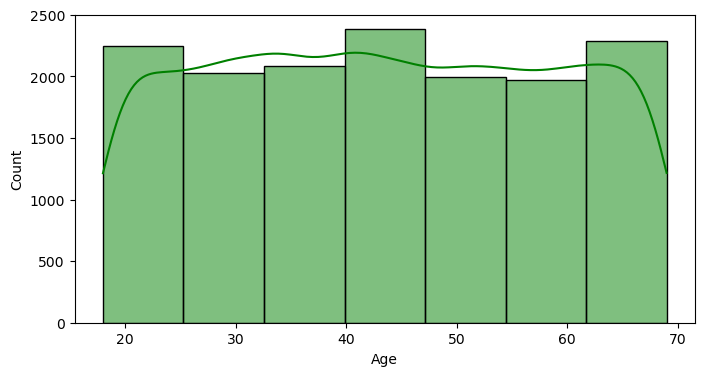

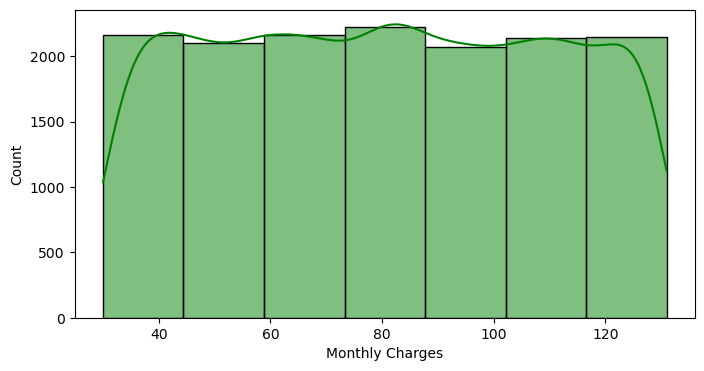

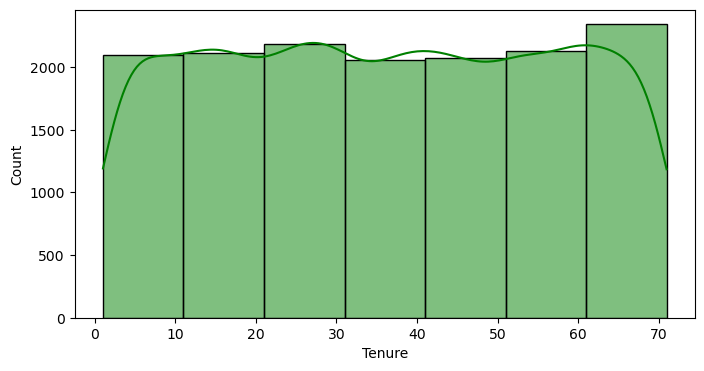

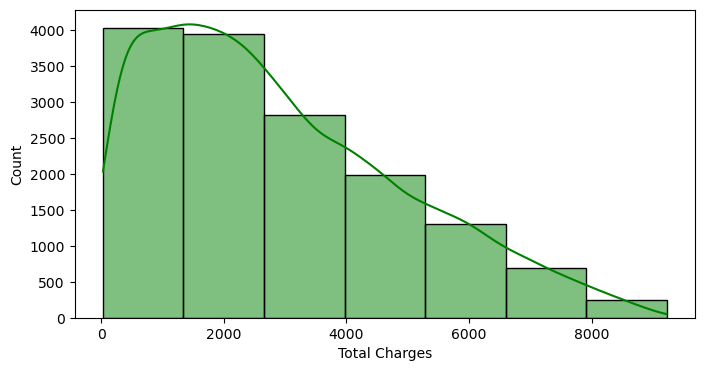

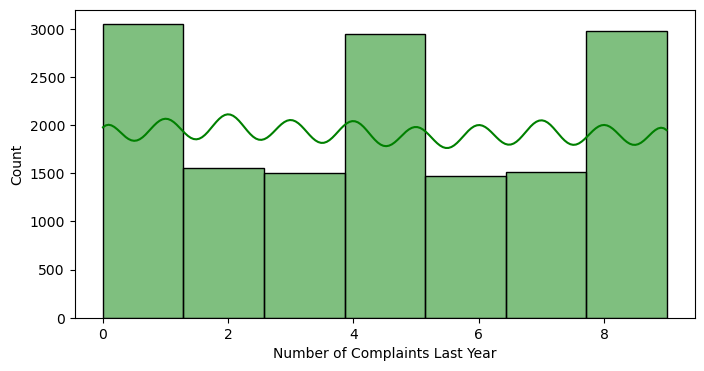

In [33]:
for cols in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df,x=cols,bins=7,kde=True,color="green")
    plt.show()

### **_Count of Customers as per Age group_ -**
**1.** The youngest (18-25) and oldest (65-70) age group have less customers.

**2.** Most customers are in the range of 25-65 age group.

**3.** Count of age graph is not skewed, it is somehow evenly distributed.

**4.** Highest peak of graph is 40-50, means very high no of customers have age between 40-50.

**5.** The curve starts lower at younger ages, remains stable in mid-ages, and drops off at older ages.

### **_Count of Monthly Charges_ -**
**1.** Minimum is 30 and maximum is 130.

**2.** The KDE is first lower at (30-40) monthly charges, the it is stable upto 120 montly charges after KDE drops off.

**3.** Peak of the graph is on 80, means most of the customers pays monthly charge 80 rs.

**4.** In this graph somehow stability is 40 to 120 monthly charges.

### **_Count of Tenure_ -**
**1.** Most stable graph of tenure is between 10 to 60.

**2.** Peak of graaph is 20-30, most of the customers with service provider since 20 to 30 months.

**3.** In this graph somehow stability is 10 to 60 tenure.

### **_Count of Total Charges_ -**
**1.** The graph is positive skewed.

**2.** The peak is near 1300-2000 means most of the customers pays in between this range.

**3.** Their is high drop after 2000 till 9000.

**4.** Most customers pay low total charges and very few pays high charges.

### **_Count of no of complaints last year_ -**
**1.** No of complaints has range 1 to 9.

**2.** Their is stability in this graph.

**3.** Most customers having complaints upto 0, 4 or 8.

## **Recommendations -**

**1.** We should focus on the customers having age 30 to 50, because more customers are of this age group.

**2.** We should focus on customers which pays monthly charges in 40 to 120.

**3.** We should focus on customers which are from 10-60 months are with service provider.

**4.** We Should focus on customers who paid low or mid total charges because very few members have paid high total charges.

**5.** Price optimization.

**6.** Create new price plans having price range 1000-5000.


### **_Relationship of Churn with Categorical Columns_**

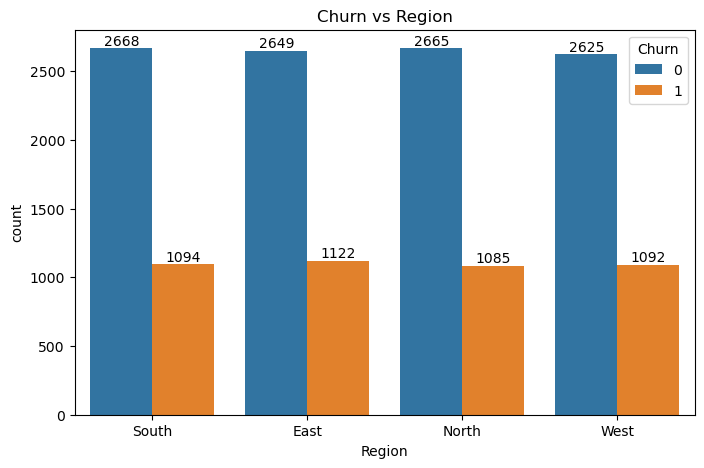

<Figure size 800x500 with 0 Axes>

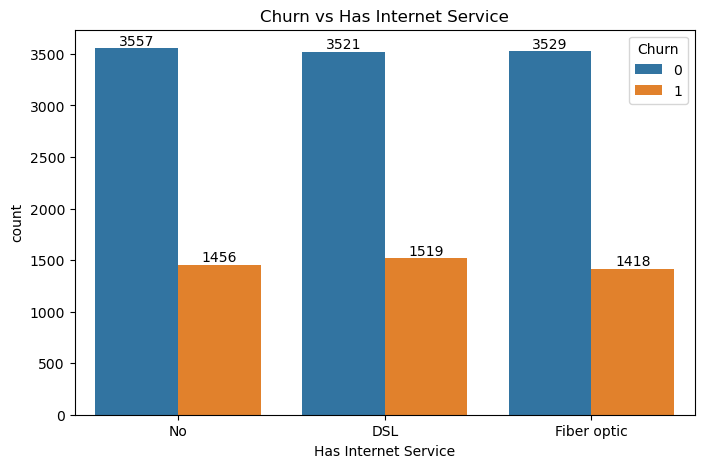

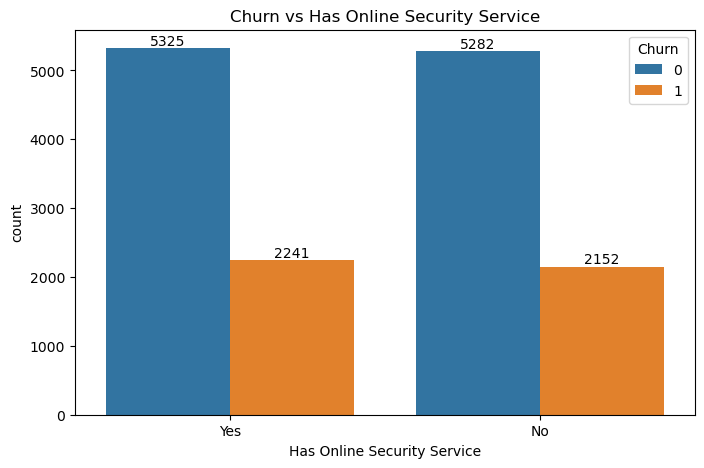

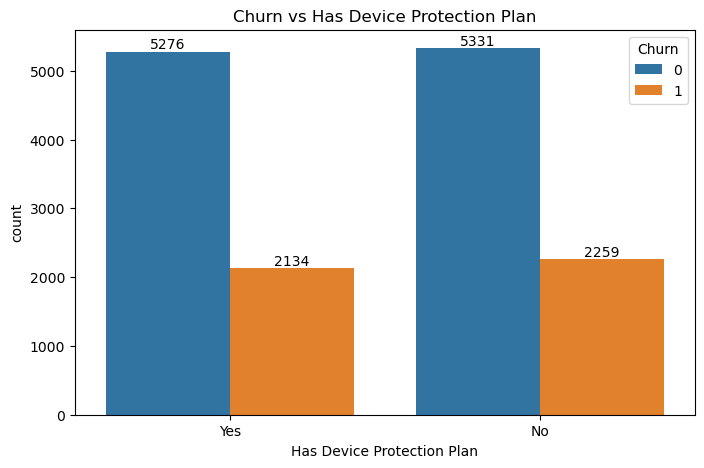

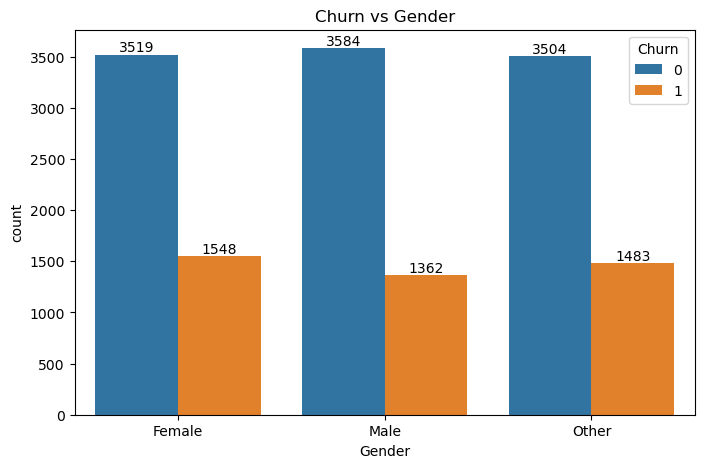

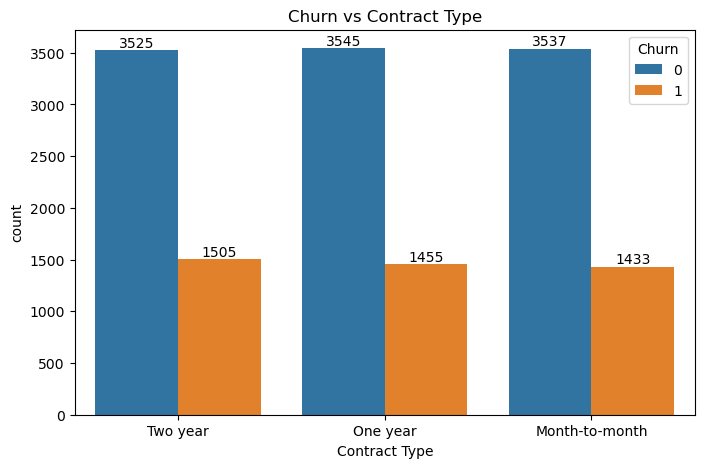

In [37]:
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    
    if col != "Churn":
       ax = sns.countplot(x=col, hue='Churn', data=df)
       for container in ax.containers:
           ax.bar_label(container)
       plt.title(f"Churn vs {col}")
       plt.show()